<a href="https://colab.research.google.com/github/09263/Applying-Principal-Component-Analysis-on-the-dataset-load_digits/blob/main/Applying_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
#   We intend to project the 64-dimensional digits dataset (captured in in X above) to 2 dimensions.
pca = PCA(2, random_state=1)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X)

print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


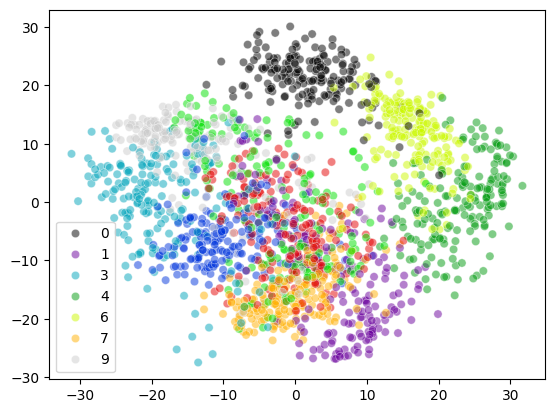

In [ ]:
sns.scatterplot(x=Xproj[:, 0], y=Xproj[:, 1], hue=y, alpha=0.5,
                palette=plt.cm.get_cmap('nipy_spectral', 10));

In [ ]:
# Effect of PCA

def make2D(digit):
    'Reshapes a len 64 digit data into an 8x8 2D'
    return digit.reshape((8,8))

In [ ]:
X_ = pca.inverse_transform(Xproj)

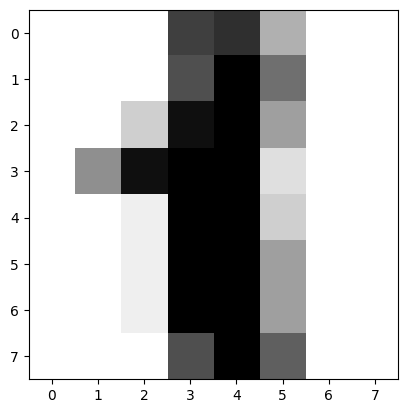

In [ ]:
# Original digit
idx = 1
plt.imshow(make2D(X[idx]),
           cmap=plt.cm.binary)

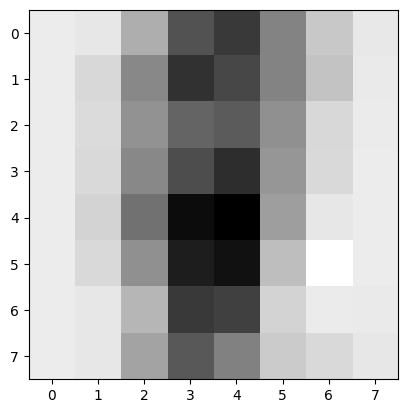

In [ ]:
# Transformed digit
plt.imshow(make2D(X_[idx]),
           cmap=plt.cm.binary)

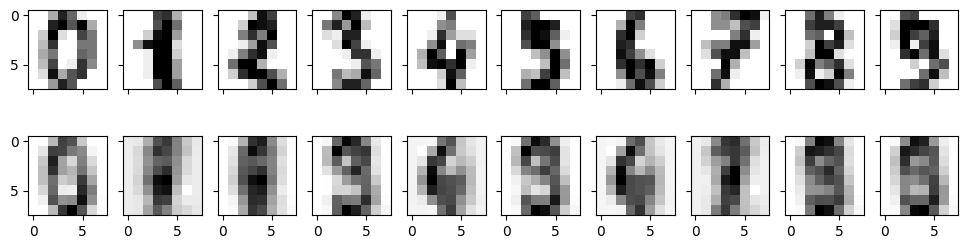

In [ ]:
fig = plt.figure(figsize=(12,3))
axes = fig.subplots(2,10, sharex=True, sharey=True)
for i in range(10):
    axes[0,i].imshow(make2D(X[i]), cmap=plt.cm.binary)

for i in range(10):
    axes[1,i].imshow(make2D(X_[i]), cmap=plt.cm.binary)

In [ ]:
# Error in Reduction
# RMSE
def rmse(X, X_):
    'Calculate the Root Mean Square error between the original and transformed data'
    return np.sqrt(np.sum((X_ - X)**2)/len(X))

In [ ]:
def calc_errors(ndims_min, ndims_max):
    'Returns a list of errors for all dimensions from `ndims_min` to `ndims_max`'
    errors = []
    for n_components in range(ndims_min,ndims_max+1):
        pca = PCA(n_components)
        Xproj = pca.fit_transform(X)
        X_ = pca.inverse_transform(Xproj)
        errors.append(rmse(X, X_))

    return errors

In [ ]:

error = rmse(X, X_)
error

29.307759737802296

In [ ]:
ndimension_min = 2
ndimension_max = 64
errors = calc_errors(ndimension_min,ndimension_max)
errors

[29.307759737802165,
 26.78124800333857,
 24.823197418114972,
 23.381972700909238,
 22.082595306625553,
 20.875479027520335,
 19.79382259131074,
 18.748549431986536,
 17.734609644852082,
 16.912063332407048,
 16.084440027970803,
 15.388880374900197,
 14.680102347952547,
 14.067009903790284,
 13.451503055664547,
 12.849338812801596,
 12.25179912567899,
 11.742845347857806,
 11.2693126060287,
 10.784756982411224,
 10.3312398466436,
 9.874938272199945,
 9.42471703170762,
 8.97045587705394,
 8.561833886641937,
 8.14779075423624,
 7.758542506178748,
 7.36982508405941,
 7.011453486045175,
 6.683952714098464,
 6.358214506829887,
 6.032125307781422,
 5.695544499594512,
 5.360444712986412,
 5.020388241180205,
 4.703365413632522,
 4.402856409983216,
 4.08833228963607,
 3.764859183139555,
 3.448542832385556,
 3.1601054931097114,
 2.8583408221474604,
 2.5457981657386926,
 2.2538625244984676,
 1.9463803569739933,
 1.621760535582607,
 1.3036124557311832,
 1.0148534877585778,
 0.7376536255173702,
 0.

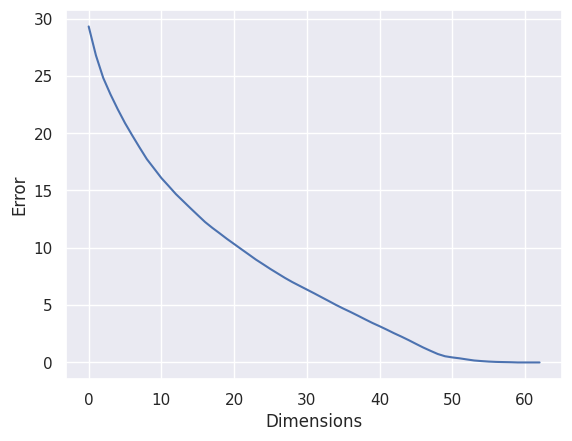

In [ ]:
sns.set()
plt.xlabel('Dimensions')
plt.ylabel('Error')
plt.plot(errors);

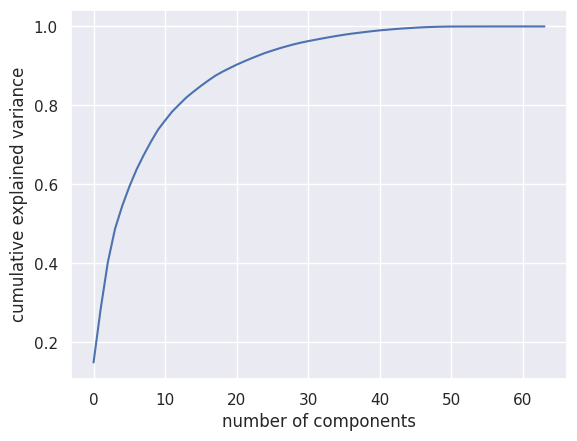

In [ ]:
# Explained Variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca = PCA(0.9, random_state=1)
Xproj = pca.fit_transform(X)
reduced_shape = Xproj.shape
reduced_shape

(1797, 21)

In [ ]:
# Q) from sklearn.decomposition import PCA
digits_pca=PCA(n_components = 0.98).fit(digits.data)
digits_redu=digits_pca.transform(digits.data)
digits_inv=digits_pca.inverse_transform(digits_redu)
rmse= np.sqrt(np.sum((digits_inv-digits.data)**2)/len(digits.data))
print(rmse)

4.703334384261629
